In [1]:
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import os
import pandas as pd

In [2]:
!which pip

/home/samir/miniconda3/envs/gendis/bin/pip


In [3]:
!pip freeze | grep GENDIS

GENDIS==1.0.13


In [4]:
from gendis.genetic import GeneticExtractor
from gendis.fitness import SubgroupDistance

In except import


/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
error_df = pd.read_csv('data/gunpoint_processed_error.csv')

In [6]:
error_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,144,145,146,147,148,149,truth,clf_pred,clf_prob,error
0,-1.054014,-1.050717,-1.047666,-1.047448,-1.048769,-1.047781,-1.047891,-1.047536,-1.047369,-1.044656,...,-1.071325,-1.068112,-1.068966,-1.069154,-1.066642,-1.064798,1,1,0.920254,0.079746
1,-0.966288,-0.971525,-0.971881,-0.972672,-0.966935,-0.966532,-0.967584,-0.966147,-0.966501,-0.966086,...,-1.009584,-1.011476,-1.010935,-1.008073,-1.009745,-1.006283,1,1,0.927635,0.072365
2,-0.693911,-0.690750,-0.683657,-0.676097,-0.675943,-0.674141,-0.671976,-0.670974,-0.670276,-0.670103,...,-0.591039,-0.590049,-0.588937,-0.586893,-0.586506,-0.589174,2,2,0.095378,0.095378


In [7]:
X_train = error_df.drop(columns=['truth', 'clf_pred', 'clf_prob', 'error'])
y_train = error_df['error']

In [8]:
y_train.describe()

count    66.000000
mean      0.244938
std       0.194964
min       0.000008
25%       0.104760
50%       0.195218
75%       0.367542
max       0.734978
Name: error, dtype: float64

In [9]:
help(GeneticExtractor)

Help on class GeneticExtractor in module gendis.genetic:

class GeneticExtractor(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  Feature selection with genetic algorithm.
 |  
 |  Parameters
 |  ----------
 |  population_size : int
 |      The number of individuals in our population. Increasing this parameter
 |      increases both the runtime per generation, as the probability of
 |      finding a good solution.
 |  
 |  iterations : int
 |      The maximum number of generations the algorithm may run.
 |  
 |  wait : int
 |      If no improvement has been found for `wait` iterations, then stop
 |  
 |  add_noise_prob : float
 |      The chance that gaussian noise is added to a random shapelet from a
 |      random individual every generation
 |  
 |  add_shapelet_prob : float
 |      The chance that a shapelet is added to a random shapelet set every gen
 |  
 |  remove_shapelet_prob : float
 |      The chance that a shapelet is deleted to a random shap set every gen
 | 

In [10]:
fitness_func = SubgroupDistance(
    distance_function=SubgroupDistance.wasserstein_distance, 
    shapelet_dist_threshold=1.0
)

args = {
    "fitness": fitness_func,
    "population_size": 100, 
    "iterations": 50,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3,
    "max_shaps": 5,
    "wait": 20, 
    "max_len": 30,
    "n_jobs": multiprocessing.cpu_count() - 1,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [11]:
gendis.__dict__

{'population_size': 100,
 'iterations': 50,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 15,
 'normed': False,
 '_min_length': 0,
 'max_len': 30,
 'max_shaps': 5,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len, max_len)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len, max_len, n_draw=None)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(shapelets, toolbox)>,
  <function gendis.operators.mask_shapelet(shapelets, toolbox)>],
 'is_fitted': False,
 'fitness': <gendis.fitness.SubgroupDistance at 0x7f06a3885c88>,
 'label_mapping': {},
 'shapelets': []}

In [12]:
%%time
gendis.fit(X_train, y_train.values)

it		avg		std		max		time
1		0.0681		0.033		0.158763	0.989
2		0.0852		0.034		0.158763	1.2702
3		0.0938		0.025		0.158763	1.3943
4		0.0982		0.027		0.158763	1.5757
5		0.1017		0.029		0.158763	1.6912
6		0.11		0.024		0.158763	1.7083
7		0.1124		0.022		0.158763	1.7287
8		0.1207		0.022		0.158763	1.7257
9		0.123		0.023		0.158763	1.6619
10		0.1171		0.023		0.158763	1.7764
11		0.1192		0.025		0.158763	1.6061
12		0.1216		0.027		0.158763	1.5301
13		0.1217		0.023		0.158763	1.6376
14		0.125		0.026		0.158763	1.7331
15		0.1257		0.029		0.158763	1.7854
16		0.1205		0.027		0.158763	2.1224
17		0.1326		0.032		0.217589	1.8285
18		0.1363		0.036		0.217589	1.6629
19		0.1439		0.027		0.217589	1.6729
20		0.1534		0.025		0.217589	1.4856
21		0.1449		0.047		0.217589	1.6469
22		0.1598		0.033		0.217589	1.6539
23		0.1625		0.038		0.224762	1.5217
24		0.1579		0.037		0.224762	1.5987
25		0.1576		0.038		0.224762	1.3385
26		0.1451		0.043		0.224762	1.5453
27		0.1402		0.041		0.224762	1.78
28		0.136		0.04		0.224762	1.844
29		0.1383		0.0

In [13]:
gendis.best

{'it': 37,
 'score': 0.24561721279833787,
 'info': {'dist': 0.37061721279833787,
  'subgroup_error_mean': 0.5697614597612877,
  'rest_error_mean': 0.20013449034710898,
  'subgroup_size': 8},
 'shapelets': [array([-0.6337724 , -0.60662731, -0.59683594, -0.60674449, -0.61775662,
         -0.63014936, -0.63727758, -0.63301103, -0.6167591 , -0.58130369,
         -0.55899509, -0.53346307, -0.51793251, -0.48016986, -0.42640996,
         -0.35625366, -0.26713464, -0.03261757,  0.18056696,  0.45311081,
          0.60923158]),
  array([-0.60328658, -0.60689246, -0.61322075, -0.61046522]),
  array([ 0.3562807 ,  0.20406109,  0.0508259 , -0.11577667, -0.29423281,
         -0.43706207, -0.55848645, -0.65523925, -0.71304712, -0.75369042,
         -0.79114623, -0.82267273, -0.850532  , -0.86522268, -0.87047078,
         -0.87854848, -0.87962322, -0.88185813, -0.88887482, -0.89142317,
         -0.89926465, -0.90251426, -0.9109459 , -0.92075052, -0.92570512,
         -0.9323098 , -0.93853576]),
  arra

In [14]:
gendis.top_10_best

[{'score': 0.24561721279833787,
  'info': {'dist': 0.37061721279833787,
   'subgroup_error_mean': 0.5697614597612877,
   'rest_error_mean': 0.20013449034710898,
   'subgroup_size': 8},
  'shapelets': [array([-0.75108708, -0.76486829, -0.77715414, -0.78785012, -0.79642382,
          -0.80135615, -0.80167268, -0.80218762, -0.80175017]),
   array([1.7206241 , 1.72131738, 1.72140531, 1.72128249, 1.72033533,
          1.72194564, 1.71689301, 1.71902919, 1.7155833 , 1.71004821,
          1.70617365, 1.7012087 , 1.69932883]),
   array([ 0.19026054,  0.05696941, -0.07639425, -0.22212105, -0.37840172,
          -0.50319769, -0.60948827, -0.69409505, -0.74456217, -0.78019322,
          -0.81299073, -0.84079283, -0.86445287, -0.87607798, -0.87662209,
          -0.87517392, -0.86702462, -0.86177938, -0.86326211, -0.86427796,
          -0.86965012, -0.87209101, -0.87913046, -0.88558885, -0.88734384,
          -0.89100153, -0.89528404]),
   array([ 0.3562807 ,  0.20406109,  0.0508259 , -0.11577667, 

In [15]:
help(gendis.transform)

Help on method transform in module gendis.genetic:

transform(X, shapelets=None) method of gendis.genetic.GeneticExtractor instance
    After fitting the Extractor, we can transform collections of 
    timeseries in matrices with distances to each of the shapelets in
    the evolved shapelet set.
    
    Parameters
    ----------
    X : array-like, shape = [n_ts, ]
        The training input timeseries. Each timeseries must be an array,
        but the lengths can be variable
    
    Returns
    -------
    D : array-like, shape = [n_ts, n_shaps]
        The matrix with distances
    L : array-like, shape = [n_ts, n_shaps]
        The matrix with localization of shapelets



In [16]:
D, L = gendis.transform(X=X_train)

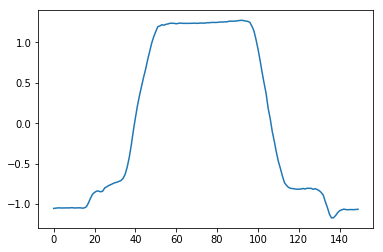

In [17]:
plt.plot(X_train.iloc[0].values)

In [18]:
import numpy as np
sg_filter = SubgroupDistance.filter_subgroup_shapelets(
    y_train, D, shapelet_dist_threshold=1.0, return_filter=True
)
[sg_indexes] = np.where(sg_filter)
[not_sg_indexes] = np.where(~sg_filter)

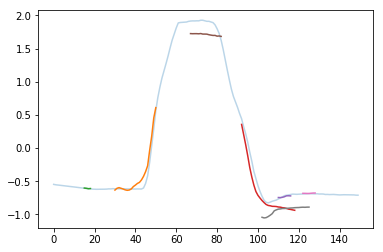

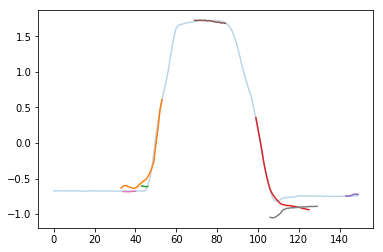

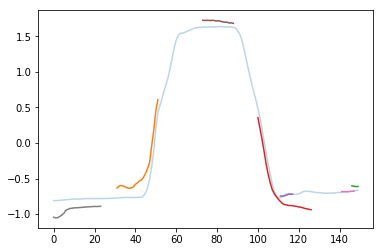

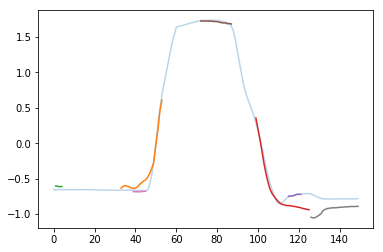

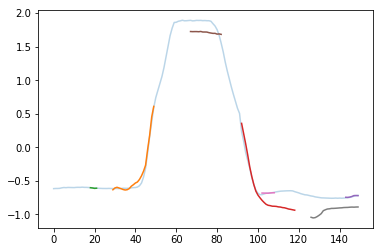

In [19]:
from math import ceil, floor


for series_idx in sg_indexes[:5]:
    series = X_train.iloc[series_idx].values
    plt.plot(series, alpha=0.3)

    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        #shap = gendis.best["shapelets"][shap_idx]
        k = loc * float(len(series) - len(shap)) 


        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))

        plt.plot(shap_idx, shap)
    
    plt.show()

In [20]:
import os
os.makedirs('./result')

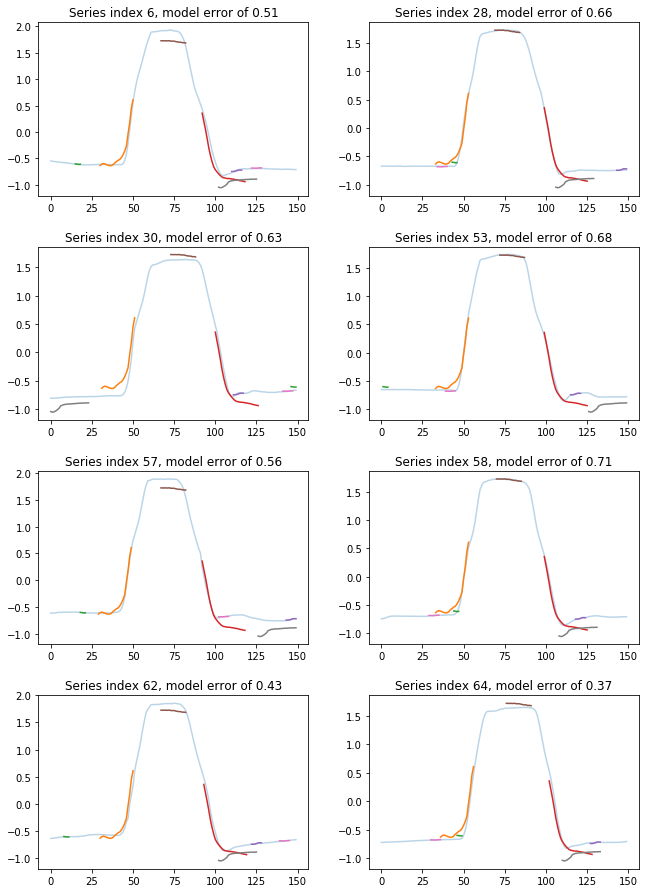

In [22]:
row_n, col_m = (5, 2)
adjust_w, adjust_h = (1, 0.5)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=3.0)


#for i, series_idx in enumerate(sg_indexes[0:row_n*col_m]):
for i, series_idx in enumerate(sg_indexes):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    
    series = X_train.iloc[series_idx].values
    ax.plot(series, alpha=0.3)
    model_error = y_train[series_idx]
    ax.title.set_text(f'Series index {series_idx}, model error of {model_error:.2f}')
    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        shap = gendis.best["shapelets"][shap_idx]

        k = loc * float(len(series) - len(shap)) 
        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))
        ax.plot(shap_idx, shap)

i+=1
while i < (row_n*col_m):
    row, col = i//col_m, i%col_m
    axs[row][col].remove()
    i+=1
        
sg_error = gendis.best['info']['subgroup_error_mean']
plt.savefig(f'results/shapelets_subgroup_error_{sg_error}.png',  bbox_inches='tight')

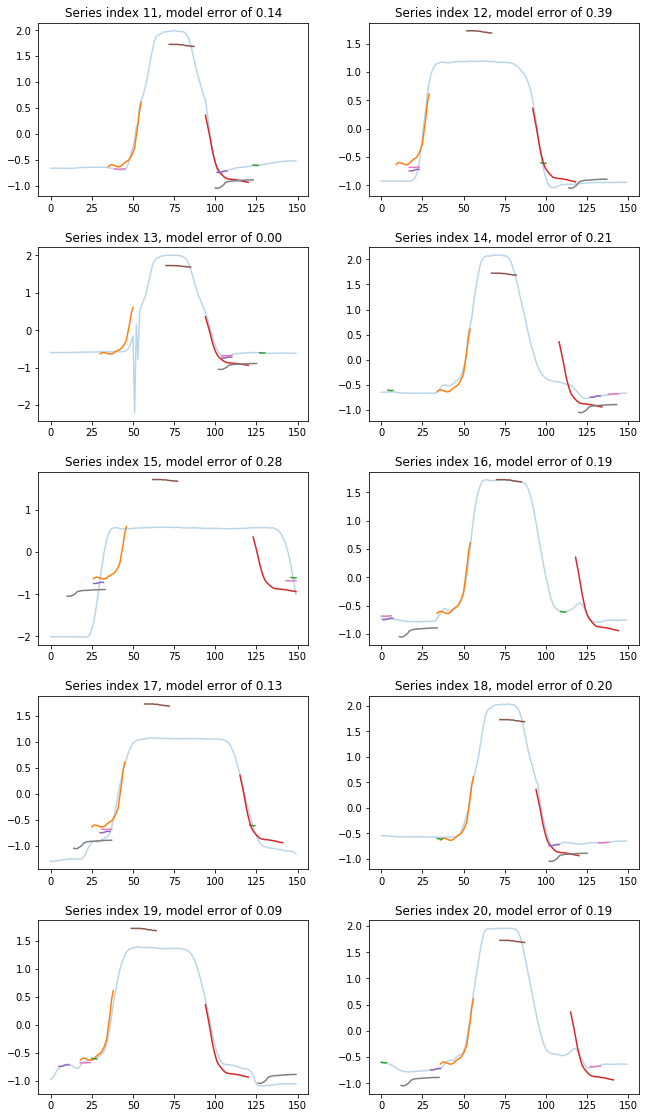

In [23]:
row_n, col_m = (5, 2)
adjust_w, adjust_h = (1, 0.5)
default_w, default_h = (4.8, 6.4)
figsize = (col_m*default_w*adjust_w, row_n*default_h*adjust_h)

fig, axs = plt.subplots(row_n, col_m, figsize=figsize)
fig.tight_layout(pad=3.0)


#for i, series_idx in enumerate(sg_indexes[0:row_n*col_m]):
for i, series_idx in enumerate(not_sg_indexes[10:20]):
    row, col = i//col_m, i%col_m
    ax = axs[row][col]
    
    series = X_train.iloc[series_idx].values
    ax.plot(series, alpha=0.3)
    model_error = y_train[series_idx]
    ax.title.set_text(f'Series index {series_idx}, model error of {model_error:.2f}')
    for shap_idx, shap in enumerate(gendis.best["shapelets"]): 

        loc = L[series_idx][shap_idx]
        shap = gendis.best["shapelets"][shap_idx]
        #shap = gendis.best["shapelets"][shap_idx]
        k = loc * float(len(series) - len(shap)) 
        start = floor(k)
        end = ceil(start + len(shap))
        shap_idx = list(range(start, end))
        ax.plot(shap_idx, shap)

i+=1
while i < (row_n*col_m):
    row, col = i//col_m, i%col_m
    axs[row][col].remove()
    i+=1
        
plt.savefig(f'results/samples_notin_sg.png',  bbox_inches='tight')

In [24]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = f'./results/gunpoint/{ts}/'
os.makedirs(folder)
gendis.save(f'{folder}/gendis.pickle')